In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [228]:
#reading in CSV file
orignaldata=pd.read_csv("recourses/cscpopendata.csv")
orignaldata.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [229]:
#creating a data frame from orginal data of the information needed
orginaldataC=orignaldata[["ProductName", 'CSF', "CompanyName", "BrandName", "PrimaryCategory","SubCategory", "ChemicalId", "ChemicalName", "InitialDateReported", "MostRecentDateReported",
                             "DiscontinuedDate", "ChemicalCreatedAt", "ChemicalUpdatedAt", "ChemicalDateRemoved"]]
orginaldataC.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),Lip Gloss/Shine,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN


In [230]:
#figuring out how many rows there are
len(orginaldataC)



114635

In [231]:
# cleaning the data by droping any duplicated data
orginaldataCD=orginaldataC.drop_duplicates()
orginaldataCD.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),Lip Gloss/Shine,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN


In [232]:
#removing any columns that are not needed
orginaldataCDR_DF=orginaldataCD.drop(columns="ChemicalId")
orginaldataCDR_DF

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),Lip Gloss/Shine,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,Rosa Soft,"Yanbal USA, Inc",YANBAL,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN
114631,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,Malva Spirit,"Yanbal USA, Inc",YANBAL,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN
114632,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,Rojo Fashion,"Yanbal USA, Inc",YANBAL,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN
114633,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,Terra Mystic,"Yanbal USA, Inc",YANBAL,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN


In [233]:
#figuring out how many rows there are
len(orginaldataCDR_DF)

113638

In [234]:
#removing any NaN values
orginaldataCDR_DF=orginaldataCDR_DF.fillna('')
orginaldataCDR_DF

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,
1,Glover's Medicated Shampoo,,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Distillates (coal tar),07/01/2009,07/01/2009,,07/01/2009,07/01/2009,
2,Glover's Medicated Shampoo,,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Estragole,07/01/2009,07/01/2009,,07/02/2009,07/02/2009,
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,,New Avon LLC,AVON,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,07/09/2009,08/28/2013,,07/09/2009,07/09/2009,
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,,New Avon LLC,AVON,Makeup Products (non-permanent),Lip Gloss/Shine,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,Rosa Soft,"Yanbal USA, Inc",YANBAL,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/19/2020,06/19/2020,,06/19/2020,06/19/2020,
114631,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,Malva Spirit,"Yanbal USA, Inc",YANBAL,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/19/2020,06/19/2020,,06/19/2020,06/19/2020,
114632,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,Rojo Fashion,"Yanbal USA, Inc",YANBAL,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/19/2020,06/19/2020,,06/19/2020,06/19/2020,
114633,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,Terra Mystic,"Yanbal USA, Inc",YANBAL,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/19/2020,06/19/2020,,06/19/2020,06/19/2020,


In [235]:
#orginaldataCDR_DF.info()

In [236]:
orginaldataCDRC_DF = orginaldataCDR_DF.reset_index(drop = True)
orginaldataCDRC_DF

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,
1,Glover's Medicated Shampoo,,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Distillates (coal tar),07/01/2009,07/01/2009,,07/01/2009,07/01/2009,
2,Glover's Medicated Shampoo,,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Estragole,07/01/2009,07/01/2009,,07/02/2009,07/02/2009,
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,,New Avon LLC,AVON,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,07/09/2009,08/28/2013,,07/09/2009,07/09/2009,
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,,New Avon LLC,AVON,Makeup Products (non-permanent),Lip Gloss/Shine,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113633,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,Rosa Soft,"Yanbal USA, Inc",YANBAL,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/19/2020,06/19/2020,,06/19/2020,06/19/2020,
113634,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,Malva Spirit,"Yanbal USA, Inc",YANBAL,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/19/2020,06/19/2020,,06/19/2020,06/19/2020,
113635,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,Rojo Fashion,"Yanbal USA, Inc",YANBAL,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/19/2020,06/19/2020,,06/19/2020,06/19/2020,
113636,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,Terra Mystic,"Yanbal USA, Inc",YANBAL,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,06/19/2020,06/19/2020,,06/19/2020,06/19/2020,


In [237]:
orginaldataCDRC_DF.nunique()

ProductName               33716
CSF                       34327
CompanyName                 606
BrandName                  2714
PrimaryCategory              13
SubCategory                  89
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            992
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         525
dtype: int64

In [238]:
O_D_Cleaned_DF=orginaldataCDRC_DF[['PrimaryCategory','ChemicalName']]
O_D_Cleaned_DF


,PrimaryCategory,ChemicalName
0,Makeup Products (non-permanent),Titanium dioxide
1,Hair Care Products (non-coloring),Distillates (coal tar)
2,Hair Care Products (non-coloring),Estragole
3,Makeup Products (non-permanent),Titanium dioxide
4,Makeup Products (non-permanent),Titanium dioxide
...,...,...
113633,Makeup Products (non-permanent),Titanium dioxide
113634,Makeup Products (non-permanent),Titanium dioxide
113635,Makeup Products (non-permanent),Titanium dioxide
113636,Makeup Products (non-permanent),Titanium dioxide


In [239]:
PrimChem_DF=O_D_Cleaned_DF.nunique()
PrimChem_DF

PrimaryCategory     13
ChemicalName       123
dtype: int64

In [240]:
#Top10_count= (O_D_Cleaned_DF['PrimaryCategory'].value_counts()).nlargest(10)
#Top10_count.plot(kind='bar')

In [246]:
count=O_D_Cleaned_DF.groupby('PrimaryCategory')['ChemicalName'].nunique()
count

PrimaryCategory
Baby Products                        13
Bath Products                        42
Fragrances                           23
Hair Care Products (non-coloring)    68
Hair Coloring Products               23
Makeup Products (non-permanent)      53
Nail Products                        32
Oral Hygiene Products                 7
Personal Care Products               32
Shaving Products                     18
Skin Care Products                   85
Sun-Related Products                 40
Tattoos and Permanent Makeup          4
Name: ChemicalName, dtype: int64

In [247]:
Prim10=count.nlargest(10)

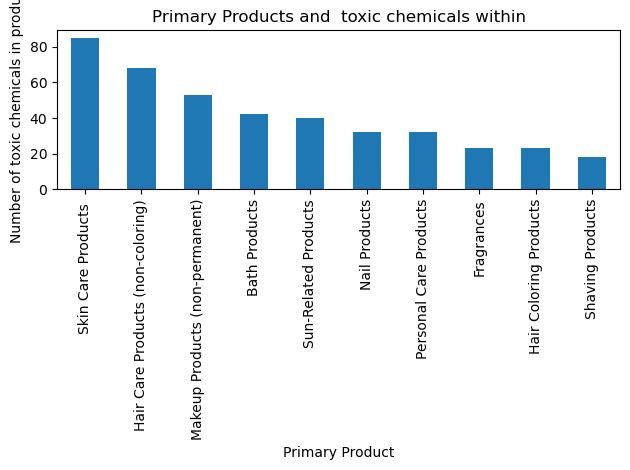

In [248]:
Prim10.plot(kind='bar') 
plt.title('Primary Products and  toxic chemicals within')
plt.xlabel('Primary Product')
plt.ylabel("Number of toxic chemicals in products")
plt.tight_layout()

In [ ]:
Prim10

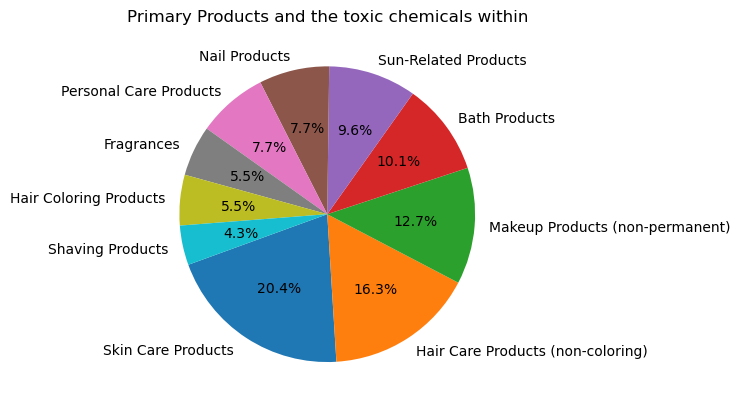

In [257]:
Prim10.plot(kind='pie', y='Number of toxic chemicals in products', autopct='%1.1f%%', startangle=200, legend=False)
plt.title('Primary Products and the toxic chemicals within')
plt.ylabel('')
plt.show()

In [250]:
O_D_Cleaned_DF2=orginaldataCDRC_DF[['SubCategory','ChemicalName']]
O_D_Cleaned_DF2.head()

,SubCategory,ChemicalName
0,"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide
1,Hair Shampoos (making a cosmetic claim),Distillates (coal tar)
2,Hair Shampoos (making a cosmetic claim),Estragole
3,Eyeliner/Eyebrow Pencils,Titanium dioxide
4,Lip Gloss/Shine,Titanium dioxide


In [251]:
count2=O_D_Cleaned_DF2.groupby('SubCategory')['ChemicalName'].nunique()
count2

SubCategory
Acne Products (making a cosmetic claim)                       19
Aftershave Products                                           15
Anti-Wrinkle/Anti-Aging Products (making a cosmetic claim)    32
Antiperspirants (making a cosmetic claim)                      2
Artificial Nails and Related Products                         10
                                                              ..
Teeth Cleaning Products                                        5
Teeth Whitening Products                                       2
Toilet Water/Eaux de Toilette                                 11
UV Gel Nail Polish                                             5
Underarm Deodorants                                            9
Name: ChemicalName, Length: 89, dtype: int64

In [252]:
Prim11=count2.nlargest(10)



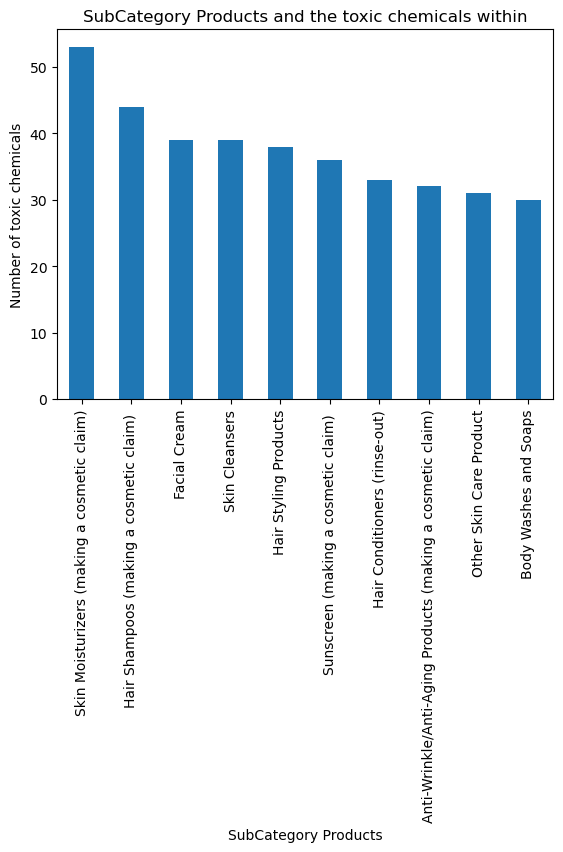

In [258]:
Prim11.plot(kind='bar')
plt.title('SubCategory Products and the toxic chemicals within')
plt.xlabel('SubCategory Products')
plt.ylabel("Number of toxic chemicals")
plt.tight_layout()

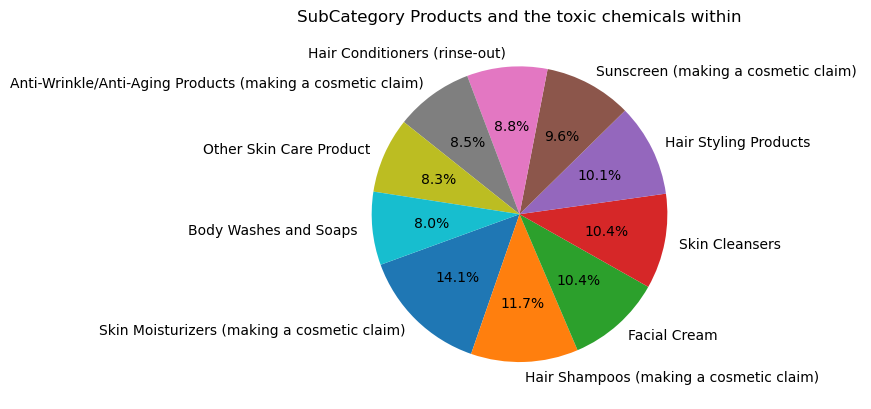

In [260]:
Prim11.plot(kind='pie', autopct='%1.1f%%', startangle=200, legend=False)
plt.title('SubCategory Products and the toxic chemicals within')
plt.ylabel('')
plt.show()